In [1]:
import ccxt
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import tz
import matplotlib.pyplot as plt

import json
import time
import os
import sys

In [2]:
src_path = '../src/'
sys.path.append(os.path.abspath(src_path))
import func_get
import func_signal
import func_backtest

In [3]:
start_ts = time.time()

In [4]:
interval_dict = {
    '1m': 1,
    '5m': 5,
    '15m': 15,
    '30m': 30,
    '1h': 60,
    '2h': 120,
    '4h': 240,
    '1d': 1440
}

In [5]:
with open('../../../_keys/ftx/ftx_read_keys.json') as keys_file:
    keys_dict = json.load(keys_file)
    
exchange = ccxt.ftx({'apiKey': keys_dict['apiKey'],
                     'secret': keys_dict['secret'],
                     'enableRateLimit': True})

### Config

In [6]:
project_name = 'ultimate'

In [7]:
start_date = dt.datetime(2022, 1, 1)
start_hour = 0
end_date = dt.datetime.today() - dt.timedelta(days=1)
reinvest_profit_flag = True

In [8]:
config_params = {
    'safety_ohlcv_range': 1000,
    'action_timeframe': '1h',
    'target_side': ['buy', 'sell'],
    'base': {
        'symbol': ['ETH-PERP', 'SOL-PERP', 'LUNA-PERP'],
        'open': {
            '1h': {
                'supertrend': {
                    'check': ['check_signal_side_change'],
                    'look_back': 1,
                    'atr_range': 50,
                    'multiplier': 5.1,
                    'revert': False
                },
                'donchian': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 30,
                    'revert': False
                },
                'hull': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 180,
                    'revert': False
                }
            },
            '4h': {
                'supertrend': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'atr_range': 50,
                    'multiplier': 5.1,
                    'revert': False
                },
                'donchian': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 30,
                    'revert': False
                },
                'hull': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 180,
                    'revert': False
                }    
            }    
            
        },
        'close': {
            '1h': {
                'supertrend': {
                    'check': ['check_signal_side'],
                    'look_back': 0,
                    'atr_range': 50,
                    'multiplier': 5.1,
                    'revert': False
                } 
            }
        }
    },
    'lead': {
        'symbol': [],
        'open': {
        },
        'close': {
        }
    },
    'tp': {
        'stop_percent': 50,
        'price_percent': 5,
        'signal': None,
    },
    'sl': {
        'stop_percent': 50,
        'price_percent': None,
        'signal': {
            'timeframe': '1h',
            'signal': {
                'supertrend': {
                    'look_back': 0,
                    'atr_range': 50,
                    'multiplier': 5.1,
                    'revert': False
                }
            }
        }
    },
    'action_percent': 10,
    'leverage': 5,
    'taker_fee_percent': 0.07
}

### Get data

In [9]:
ohlcv_df_dict = func_get.get_data(exchange, start_date, end_date, start_hour, interval_dict, config_params)

base: timeframe 1/2 symbol 1/3 date 1/286
base: timeframe 1/2 symbol 1/3 date 2/286
base: timeframe 1/2 symbol 1/3 date 3/286
base: timeframe 1/2 symbol 1/3 date 4/286
base: timeframe 1/2 symbol 1/3 date 5/286
base: timeframe 1/2 symbol 1/3 date 6/286
base: timeframe 1/2 symbol 1/3 date 7/286
base: timeframe 1/2 symbol 1/3 date 8/286
base: timeframe 1/2 symbol 1/3 date 9/286
base: timeframe 1/2 symbol 1/3 date 10/286
base: timeframe 1/2 symbol 1/3 date 11/286
base: timeframe 1/2 symbol 1/3 date 12/286
base: timeframe 1/2 symbol 1/3 date 13/286
base: timeframe 1/2 symbol 1/3 date 14/286
base: timeframe 1/2 symbol 1/3 date 15/286
base: timeframe 1/2 symbol 1/3 date 16/286
base: timeframe 1/2 symbol 1/3 date 17/286
base: timeframe 1/2 symbol 1/3 date 18/286
base: timeframe 1/2 symbol 1/3 date 19/286
base: timeframe 1/2 symbol 1/3 date 20/286
base: timeframe 1/2 symbol 1/3 date 21/286
base: timeframe 1/2 symbol 1/3 date 22/286
base: timeframe 1/2 symbol 1/3 date 23/286
base: timeframe 1/2 

base: timeframe 1/2 symbol 1/3 date 191/286
base: timeframe 1/2 symbol 1/3 date 192/286
base: timeframe 1/2 symbol 1/3 date 193/286
base: timeframe 1/2 symbol 1/3 date 194/286
base: timeframe 1/2 symbol 1/3 date 195/286
base: timeframe 1/2 symbol 1/3 date 196/286
base: timeframe 1/2 symbol 1/3 date 197/286
base: timeframe 1/2 symbol 1/3 date 198/286
base: timeframe 1/2 symbol 1/3 date 199/286
base: timeframe 1/2 symbol 1/3 date 200/286
base: timeframe 1/2 symbol 1/3 date 201/286
base: timeframe 1/2 symbol 1/3 date 202/286
base: timeframe 1/2 symbol 1/3 date 203/286
base: timeframe 1/2 symbol 1/3 date 204/286
base: timeframe 1/2 symbol 1/3 date 205/286
base: timeframe 1/2 symbol 1/3 date 206/286
base: timeframe 1/2 symbol 1/3 date 207/286
base: timeframe 1/2 symbol 1/3 date 208/286
base: timeframe 1/2 symbol 1/3 date 209/286
base: timeframe 1/2 symbol 1/3 date 210/286
base: timeframe 1/2 symbol 1/3 date 211/286
base: timeframe 1/2 symbol 1/3 date 212/286
base: timeframe 1/2 symbol 1/3 d

base: timeframe 1/2 symbol 2/3 date 94/286
base: timeframe 1/2 symbol 2/3 date 95/286
base: timeframe 1/2 symbol 2/3 date 96/286
base: timeframe 1/2 symbol 2/3 date 97/286
base: timeframe 1/2 symbol 2/3 date 98/286
base: timeframe 1/2 symbol 2/3 date 99/286
base: timeframe 1/2 symbol 2/3 date 100/286
base: timeframe 1/2 symbol 2/3 date 101/286
base: timeframe 1/2 symbol 2/3 date 102/286
base: timeframe 1/2 symbol 2/3 date 103/286
base: timeframe 1/2 symbol 2/3 date 104/286
base: timeframe 1/2 symbol 2/3 date 105/286
base: timeframe 1/2 symbol 2/3 date 106/286
base: timeframe 1/2 symbol 2/3 date 107/286
base: timeframe 1/2 symbol 2/3 date 108/286
base: timeframe 1/2 symbol 2/3 date 109/286
base: timeframe 1/2 symbol 2/3 date 110/286
base: timeframe 1/2 symbol 2/3 date 111/286
base: timeframe 1/2 symbol 2/3 date 112/286
base: timeframe 1/2 symbol 2/3 date 113/286
base: timeframe 1/2 symbol 2/3 date 114/286
base: timeframe 1/2 symbol 2/3 date 115/286
base: timeframe 1/2 symbol 2/3 date 11

base: timeframe 1/2 symbol 2/3 date 282/286
base: timeframe 1/2 symbol 2/3 date 283/286
base: timeframe 1/2 symbol 2/3 date 284/286
base: timeframe 1/2 symbol 2/3 date 285/286
base: timeframe 1/2 symbol 2/3 date 286/286
base: timeframe 1/2 symbol 3/3 date 1/286
base: timeframe 1/2 symbol 3/3 date 2/286
base: timeframe 1/2 symbol 3/3 date 3/286
base: timeframe 1/2 symbol 3/3 date 4/286
base: timeframe 1/2 symbol 3/3 date 5/286
base: timeframe 1/2 symbol 3/3 date 6/286
base: timeframe 1/2 symbol 3/3 date 7/286
base: timeframe 1/2 symbol 3/3 date 8/286
base: timeframe 1/2 symbol 3/3 date 9/286
base: timeframe 1/2 symbol 3/3 date 10/286
base: timeframe 1/2 symbol 3/3 date 11/286
base: timeframe 1/2 symbol 3/3 date 12/286
base: timeframe 1/2 symbol 3/3 date 13/286
base: timeframe 1/2 symbol 3/3 date 14/286
base: timeframe 1/2 symbol 3/3 date 15/286
base: timeframe 1/2 symbol 3/3 date 16/286
base: timeframe 1/2 symbol 3/3 date 17/286
base: timeframe 1/2 symbol 3/3 date 18/286
base: timeframe

base: timeframe 1/2 symbol 3/3 date 185/286
base: timeframe 1/2 symbol 3/3 date 186/286
base: timeframe 1/2 symbol 3/3 date 187/286
base: timeframe 1/2 symbol 3/3 date 188/286
base: timeframe 1/2 symbol 3/3 date 189/286
base: timeframe 1/2 symbol 3/3 date 190/286
base: timeframe 1/2 symbol 3/3 date 191/286
base: timeframe 1/2 symbol 3/3 date 192/286
base: timeframe 1/2 symbol 3/3 date 193/286
base: timeframe 1/2 symbol 3/3 date 194/286
base: timeframe 1/2 symbol 3/3 date 195/286
base: timeframe 1/2 symbol 3/3 date 196/286
base: timeframe 1/2 symbol 3/3 date 197/286
base: timeframe 1/2 symbol 3/3 date 198/286
base: timeframe 1/2 symbol 3/3 date 199/286
base: timeframe 1/2 symbol 3/3 date 200/286
base: timeframe 1/2 symbol 3/3 date 201/286
base: timeframe 1/2 symbol 3/3 date 202/286
base: timeframe 1/2 symbol 3/3 date 203/286
base: timeframe 1/2 symbol 3/3 date 204/286
base: timeframe 1/2 symbol 3/3 date 205/286
base: timeframe 1/2 symbol 3/3 date 206/286
base: timeframe 1/2 symbol 3/3 d

base: timeframe 2/2 symbol 1/3 date 88/161
base: timeframe 2/2 symbol 1/3 date 89/161
base: timeframe 2/2 symbol 1/3 date 90/161
base: timeframe 2/2 symbol 1/3 date 91/161
base: timeframe 2/2 symbol 1/3 date 92/161
base: timeframe 2/2 symbol 1/3 date 93/161
base: timeframe 2/2 symbol 1/3 date 94/161
base: timeframe 2/2 symbol 1/3 date 95/161
base: timeframe 2/2 symbol 1/3 date 96/161
base: timeframe 2/2 symbol 1/3 date 97/161
base: timeframe 2/2 symbol 1/3 date 98/161
base: timeframe 2/2 symbol 1/3 date 99/161
base: timeframe 2/2 symbol 1/3 date 100/161
base: timeframe 2/2 symbol 1/3 date 101/161
base: timeframe 2/2 symbol 1/3 date 102/161
base: timeframe 2/2 symbol 1/3 date 103/161
base: timeframe 2/2 symbol 1/3 date 104/161
base: timeframe 2/2 symbol 1/3 date 105/161
base: timeframe 2/2 symbol 1/3 date 106/161
base: timeframe 2/2 symbol 1/3 date 107/161
base: timeframe 2/2 symbol 1/3 date 108/161
base: timeframe 2/2 symbol 1/3 date 109/161
base: timeframe 2/2 symbol 1/3 date 110/161


base: timeframe 2/2 symbol 2/3 date 117/161
base: timeframe 2/2 symbol 2/3 date 118/161
base: timeframe 2/2 symbol 2/3 date 119/161
base: timeframe 2/2 symbol 2/3 date 120/161
base: timeframe 2/2 symbol 2/3 date 121/161
base: timeframe 2/2 symbol 2/3 date 122/161
base: timeframe 2/2 symbol 2/3 date 123/161
base: timeframe 2/2 symbol 2/3 date 124/161
base: timeframe 2/2 symbol 2/3 date 125/161
base: timeframe 2/2 symbol 2/3 date 126/161
base: timeframe 2/2 symbol 2/3 date 127/161
base: timeframe 2/2 symbol 2/3 date 128/161
base: timeframe 2/2 symbol 2/3 date 129/161
base: timeframe 2/2 symbol 2/3 date 130/161
base: timeframe 2/2 symbol 2/3 date 131/161
base: timeframe 2/2 symbol 2/3 date 132/161
base: timeframe 2/2 symbol 2/3 date 133/161
base: timeframe 2/2 symbol 2/3 date 134/161
base: timeframe 2/2 symbol 2/3 date 135/161
base: timeframe 2/2 symbol 2/3 date 136/161
base: timeframe 2/2 symbol 2/3 date 137/161
base: timeframe 2/2 symbol 2/3 date 138/161
base: timeframe 2/2 symbol 2/3 d

base: timeframe 2/2 symbol 3/3 date 146/161
base: timeframe 2/2 symbol 3/3 date 147/161
base: timeframe 2/2 symbol 3/3 date 148/161
base: timeframe 2/2 symbol 3/3 date 149/161
base: timeframe 2/2 symbol 3/3 date 150/161
base: timeframe 2/2 symbol 3/3 date 151/161
base: timeframe 2/2 symbol 3/3 date 152/161
base: timeframe 2/2 symbol 3/3 date 153/161
base: timeframe 2/2 symbol 3/3 date 154/161
base: timeframe 2/2 symbol 3/3 date 155/161
base: timeframe 2/2 symbol 3/3 date 156/161
base: timeframe 2/2 symbol 3/3 date 157/161
base: timeframe 2/2 symbol 3/3 date 158/161
base: timeframe 2/2 symbol 3/3 date 159/161
base: timeframe 2/2 symbol 3/3 date 160/161
base: timeframe 2/2 symbol 3/3 date 161/161


### Add signal

In [10]:
ohlcv_df_dict = func_signal.add_signal(start_date, ohlcv_df_dict, interval_dict, config_params)

base add supertrend to ETH-PERP 4h
base add donchian to ETH-PERP 4h
base add hull to ETH-PERP 4h
base add supertrend to SOL-PERP 4h
base add donchian to SOL-PERP 4h
base add hull to SOL-PERP 4h
base add supertrend to LUNA-PERP 4h
base add donchian to LUNA-PERP 4h
base add hull to LUNA-PERP 4h
base add supertrend to ETH-PERP 1h
base add donchian to ETH-PERP 1h
base add hull to ETH-PERP 1h
base add supertrend to SOL-PERP 1h
base add donchian to SOL-PERP 1h
base add hull to SOL-PERP 1h
base add supertrend to LUNA-PERP 1h
base add donchian to LUNA-PERP 1h
base add hull to LUNA-PERP 1h


### Back test

In [11]:
action_time_list = func_get.gen_action_time_list(config_params, ohlcv_df_dict)
max_open_timeframe = func_backtest.get_max_open_timeframe(config_params, interval_dict)

In [12]:
budget = 100

transaction_dict = {
    'symbol': [],
    'side': [],
    'amount': [],
    'open_time': [],
    'open_price': [],
    'close_time': [],
    'close_price': [],
    'value': [],
    'notional': [],
    'profit': [],
    'profit_percent': []
}

position_dict = {}

if reinvest_profit_flag == True:
    budget_dict = {
        'time': [],
        'budget': []
    }
    
max_drawdown = 0

In [13]:
if reinvest_profit_flag == True:
    min_budget = budget

time_count = 0

for signal_time in action_time_list:
    action_time = signal_time + dt.timedelta(minutes=interval_dict[config_params['action_timeframe']])
    
    time_count += 1
    print(f"Time {action_time}: progress {time_count}/{len(action_time_list)}")

    '''
    Close positions
    '''
    for symbol in [x for x in position_dict.keys()]:
        print(f"  {symbol}")
        budget, max_drawdown, position_dict, transaction_dict = func_backtest.close_position(symbol, signal_time, max_drawdown, config_params, budget, reinvest_profit_flag, ohlcv_df_dict, position_dict, transaction_dict, interval_dict)

    '''
    Open positions
    '''
    max_position = int(1 / (config_params['action_percent'] / 100))

    for symbol in [x for x in config_params['base']['symbol'] if x not in position_dict.keys()][:max_position]:
        print(f"  {symbol}")
        position_dict = func_backtest.open_position(symbol, signal_time, max_open_timeframe, config_params, budget, ohlcv_df_dict, position_dict, interval_dict)    
    
    '''
    Update budget
    '''
    if reinvest_profit_flag == True:
        budget_dict['time'].append(signal_time)
        budget_dict['budget'].append(budget)

        if budget < min_budget:
            min_budget = budget

    if budget <= 0:
        print(f"Out of money at {action_time}")
        break
        
'''
Clear final position
'''
opened_symbol = list(position_dict.keys())

for symbol in opened_symbol:
    print(f" Clear {symbol} position")
    
    side = position_dict[symbol]['side']
    ohlcv_df = ohlcv_df_dict['base'][config_params['action_timeframe']][symbol]
    current_ohlcv_df = ohlcv_df[ohlcv_df['time'] == signal_time].reset_index(drop=True)
    close_price = current_ohlcv_df.loc[0, 'close']
    close_percent = 100
    
    budget, position_dict, transaction_dict = func_backtest.update_close_position(symbol, side, close_price, close_percent, signal_time, config_params, budget, reinvest_profit_flag, position_dict, transaction_dict, interval_dict)

Time 2022-01-01 01:00:00: progress 1/2856
  ETH-PERP
     Not available data
  SOL-PERP
     Not available data
  LUNA-PERP
     Not available data
Time 2022-01-01 02:00:00: progress 2/2856
  ETH-PERP
     Not available data
  SOL-PERP
     Not available data
  LUNA-PERP
     Not available data
Time 2022-01-01 03:00:00: progress 3/2856
  ETH-PERP
     Not available data
  SOL-PERP
     Not available data
  LUNA-PERP
     Not available data
Time 2022-01-01 04:00:00: progress 4/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-P

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-02 18:00:00: progress 42/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No acti

     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-04 00:00:00: progress 72/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_s

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-05 10:00:00: progress 106

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-06 17:00:00: progress 137/2856
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 3569.65522620667
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side

     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-08 08:00:00: progress 176/2856
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-08 09:00:00: progress 177/2856
  ETH-PERP
     base ETH-PE

     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-09 20:00:00: progress 212/2856
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_sig

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-11 10:00:00: progress 250/2856
  ETH-PERP
     base ETH-PERP check_signal_side supertrend 1h: sell
     Not close
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_sign

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-12 19:00:00: progress 283/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: se

     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-14 01:00:00: progress 313/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-P

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-15 08:00:00: progress 344/2856
 

     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-16 13:00:00: progress 373/2856
  ETH-PERP
     base ETH-PERP check_signal_side_ch

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side d

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_sid

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-20 10:00:00: progress 466/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No a

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-01-21 17:00:00: progress 497

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-22 22:00:00: progress 526/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-24 05:00:00: progress 55

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-25 10:00:00: progress 586/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No 

     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-26 12:00:00: progress 612/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: buy
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PE

     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-27 12:00:00: progress 636/2856
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-27 13:00:00

     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-29 02:00:00: progress 674/2856
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_acti

  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-30 17:00:00: progress 713/2856
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 57.87326834425251
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_s

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
Time 2022-01-31 22:00:00: progress 742/2856
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-02 03:00:00: progress 771/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-03 07:00:00: progress 799/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-04 19:00:00: progress 835/2856
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-06 00:00:00: progress 864/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-

     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-07 03:00:00: progress 891/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-08 06:00:00: progress 918/2856
  ETH

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-09 09:00:00: progress 945/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: bu

     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-10 17:00:00: progress 977/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  S

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side do

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-13 02:00:00: progress 1034/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No acti

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-14 05:00:00: progress 1061/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No acti

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-15 08:00:00: progress 1088/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action


     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-16 13:00:00: progress 1117/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_s

     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     N

     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-19 00:00:00: progress 1176/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 99.1782949276231
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h:

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-20 09:00:00: progress 1209/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_sign

     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: buy
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-21 16:00:00: progress 1240/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ET

     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-02-23 00:00:00: progress 1272/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP ch

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donc

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-25 05:00:00: progress 1325/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No actio

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-26 06:00:00: progress 1350/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action


     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-02-27 08:00:00: progress 1376/2856
 

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
   

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-01 08:00:00: progress 1424/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy


     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-02 13:00:00: progress 1453/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal

     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-03 17:00:00: progress 1481/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_

     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     

     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-05 17:00:00: progress 1529/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_

     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-06 16:00:00: progress 1552/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_cha

     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-07 18:00:00: progress 1578/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP ch

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-08 19:00:00: progress 160

     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-09 19:00:00: progress 1627/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base E

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side do

     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-12 06:00:00: progress 1686/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-12 07:0

     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
     Update sl: 86.67654679078629
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-13 11:00:00: progress 1715/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP chec

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-14 17:00:00: progress 1745/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_

     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-15 23:00:00: progress 1775/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: sell
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h:

     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-17 00:00:00: progress 1800/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base 

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchi

     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-19 07:00:00: progress 1855/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base 

     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-20 09:00:00: progress 1881/2856
  ETH-PERP
     base ETH-PERP check_signal_side_chang

     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-21 09:00:00: progress 1905/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_s

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 

     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-23 17:00:00: progress 1961/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_chang

     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-24 22:00:00: progress 1990/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-24 23:00:00: 

     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-26 03:00:00: progress 2019/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-26 04:00:0

     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-03-27 14:00:00: progress 2054/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_a

     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-29 03:00:00: progress 2091/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: buy
     Not close
     Update sl: 94.79585575948583
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-29 04:00:00: progress 2092/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-30 17:00:00: progress 2129/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-03-30 18:00:00: progress 2130/2856
  SOL-PERP
     base SOL-PERP check_s

     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-01 07:00:00: progress 2167/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-01 08:00:00: progress 2168/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  LUNA-PERP
     base LUNA-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PER

     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-02 13:00:00: progress 2197/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side super

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-03 21:00:00: progress 2229/2856
  SOL-PERP
     base SOL-PERP check_signal_side supertrend 1h: buy
     Not close
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP che

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-05 05:00:00: progress 2261/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: b

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: buy
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: buy
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchi

     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-07 07:00:00: progress 2311/

     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-08 08:00:00: progress 2336/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP che

     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-09 09:00:00: progress 2361/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
  

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_sid

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-11 18:00:00: progress 2418/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertre

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_si

     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-13 18:00:00: progress 2466/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
    

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-14 17:00:00: progress 2489/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No act

     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-15 18:00:00: progress 2514/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
   

     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-16 20:00:00: progress 2540/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertren

     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: sell
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-18 00:00:00: progress 2568/

     base ETH-PERP check_signal_side supertrend 1h: buy
     Closed by signal at 3006.3
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: 

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: sell
     No action
Time 2022-04-20 03:00:00: progress 2619/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sel

     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-21 02:00:00: progress 2642/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: buy
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LU

     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: buy
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-22 04:00:00: progress 2668/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: buy
     No action
  

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side 

     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-24 08:00:00: progress 2720/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: buy
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: buy
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-25 08:00:00: progress 2744/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: sell
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4

     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: buy
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-26 07:00:00: progress 2767/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base

     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: buy
     base LUNA-PERP check_signal_side hull 4h: buy
     No action
Time 2022-04-27 07:00:00: progress 2791/2856
  ETH-PERP
     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: sell
     base SOL-PERP check_signal_side supertrend 4h:

     base ETH-PERP check_signal_side_change supertrend 1h: no_action
     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: sell
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: buy
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side d

     base ETH-PERP check_signal_side donchian 1h: buy
     base ETH-PERP check_signal_side hull 1h: buy
     base ETH-PERP check_signal_side supertrend 4h: sell
     base ETH-PERP check_signal_side donchian 4h: sell
     base ETH-PERP check_signal_side hull 4h: sell
     No action
  SOL-PERP
     base SOL-PERP check_signal_side_change supertrend 1h: no_action
     base SOL-PERP check_signal_side donchian 1h: sell
     base SOL-PERP check_signal_side hull 1h: buy
     base SOL-PERP check_signal_side supertrend 4h: sell
     base SOL-PERP check_signal_side donchian 4h: sell
     base SOL-PERP check_signal_side hull 4h: sell
     No action
  LUNA-PERP
     base LUNA-PERP check_signal_side_change supertrend 1h: no_action
     base LUNA-PERP check_signal_side donchian 1h: sell
     base LUNA-PERP check_signal_side hull 1h: sell
     base LUNA-PERP check_signal_side supertrend 4h: buy
     base LUNA-PERP check_signal_side donchian 4h: sell
     base LUNA-PERP check_signal_side hull 4h: buy
 

In [14]:
end_ts = time.time()
time_process = end_ts - start_ts
print(f"Time process: {round(time_process / 60, 2)} minutes")

Time process: 4.62 minutes


### Result

In [15]:
transaction_df = pd.DataFrame(transaction_dict)
transaction_df.to_csv(f'transactions/{project_name}.csv', index=False)
transaction_df

,symbol,side,amount,open_time,open_price,close_time,close_price,value,notional,profit,profit_percent
0,ETH-PERP,sell,0.006843,2022-01-06 03:00:00,3653.2000,2022-01-06 06:00:00,3470.540000,25.000000,50.000000,1.215875,4.866907
1,ETH-PERP,sell,0.006843,2022-01-06 03:00:00,3653.2000,2022-01-12 00:00:00,3218.300000,25.000000,25.000000,2.943241,11.781212
2,LUNA-PERP,sell,0.464656,2022-01-27 09:00:00,56.0410,2022-01-28 05:00:00,53.238950,26.039779,52.079558,1.266445,4.866907
3,LUNA-PERP,sell,0.464656,2022-01-27 09:00:00,56.0410,2022-02-01 00:00:00,51.016000,26.039779,26.039779,2.300074,8.839113
4,LUNA-PERP,sell,0.569435,2022-02-03 09:00:00,47.2950,2022-02-05 00:00:00,52.899055,26.931409,53.862818,-3.231080,-12.005847
5,LUNA-PERP,sell,0.569435,2022-02-03 09:00:00,47.2950,2022-02-05 01:00:00,52.176000,26.931409,26.931409,-2.819060,-10.474886
6,SOL-PERP,sell,0.265263,2022-02-18 01:00:00,95.8250,2022-02-18 23:00:00,91.033750,25.418874,50.837748,1.236247,4.866907
7,SOL-PERP,sell,0.265263,2022-02-18 01:00:00,95.8250,2022-02-21 09:00:00,94.515000,25.418874,25.418874,0.312152,1.228893
8,SOL-PERP,sell,0.312412,2022-02-24 10:00:00,82.6025,2022-02-24 11:00:00,78.472375,25.805974,51.611947,1.255074,4.866907
9,SOL-PERP,sell,0.312412,2022-02-24 10:00:00,82.6025,2022-02-25 03:00:00,90.930000,25.805974,25.805974,-2.639557,-10.235636


In [16]:
if reinvest_profit_flag == True:
    print(f"Final budget: {round(budget, 2)}")
else:
    print("Not reinvest profit")

Final budget: 110.04


In [17]:
if reinvest_profit_flag == True:
    return_percent = (budget_dict['budget'][-1] - budget_dict['budget'][0]) / budget_dict['budget'][0] * 100
    print(f"Return: {round(return_percent, 2)}%")
else:
    print("Not reinvest profit")

Return: 10.11%


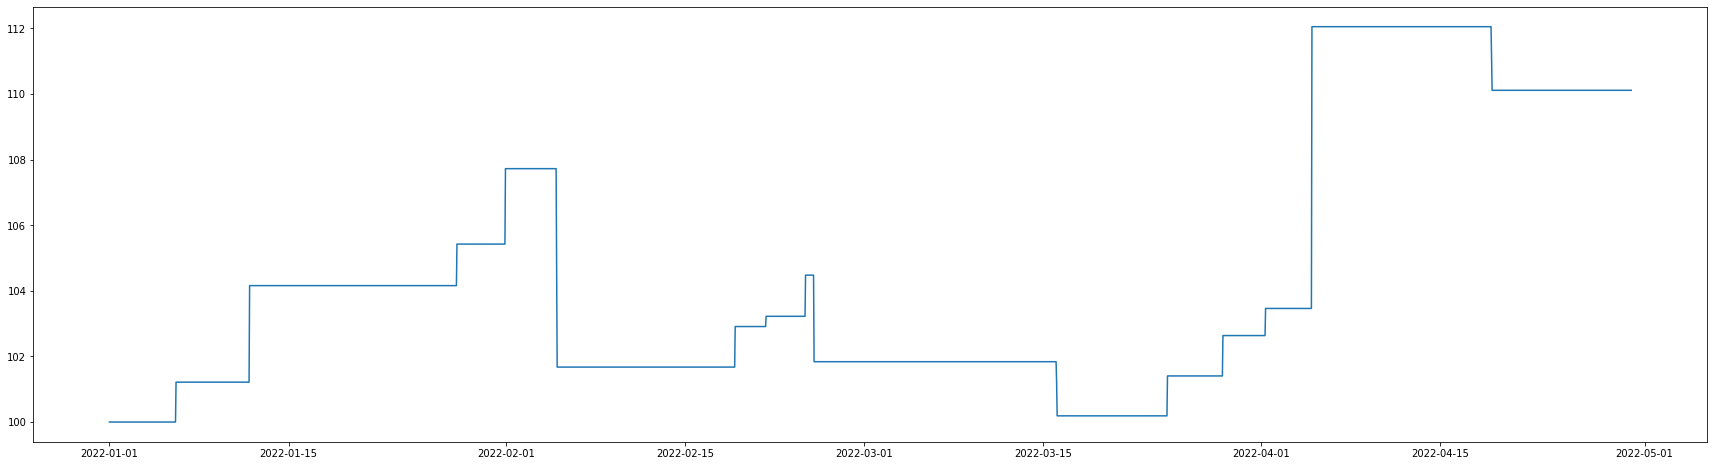

In [18]:
if reinvest_profit_flag == True:
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.plot(budget_dict['time'], budget_dict['budget'])
else:
    print("Not reinvest profit")

In [19]:
if reinvest_profit_flag == True:
    print(f"Max drawdown: {round(max_drawdown * 100, 2)}%")

Max drawdown: 11.85%


In [20]:
win_rate = len(transaction_df[transaction_df['profit'] > 0]) / len(transaction_df)
print(f"Win rate: {round(win_rate * 100, 2)}%")

Win rate: 57.89%


In [21]:
for symbol in transaction_df['symbol'].unique():
    symbol_df = transaction_df[transaction_df['symbol'] == symbol]
    win_rate = len(symbol_df[symbol_df['profit'] > 0]) / len(symbol_df)
    print(f"{symbol} win rate: {round(win_rate * 100, 2)}%")

ETH-PERP win rate: 50.0%
LUNA-PERP win rate: 66.67%
SOL-PERP win rate: 55.56%


In [22]:
print(f"Distribution")
print(pd.DataFrame(transaction_df['profit_percent'].describe()))

Distribution
       profit_percent
count       19.000000
mean         2.225511
std         10.155496
min        -12.005847
25%         -3.464598
50%          3.260119
75%          4.866907
max         34.275457


In [23]:
for symbol in transaction_df['symbol'].unique():
    temp_return = transaction_df[transaction_df['symbol'] == symbol]['profit_percent']
    
    print(f"Distribution {symbol}:")
    print(pd.DataFrame(temp_return.describe()))
    print("\n")

Distribution ETH-PERP:
       profit_percent
count        4.000000
mean         2.429731
std          7.368899
min         -3.578178
25%         -3.407807
50%          0.757945
75%          6.595483
max         11.781212


Distribution LUNA-PERP:
       profit_percent
count        6.000000
mean        -0.110249
std          8.829364
min        -12.005847
25%         -7.041135
50%          4.056611
75%          4.863456
max          8.839113


Distribution SOL-PERP:
       profit_percent
count        9.000000
mean         3.691919
std         12.507341
min        -10.235636
25%         -2.515753
50%          1.228893
75%          4.866907
max         34.275457




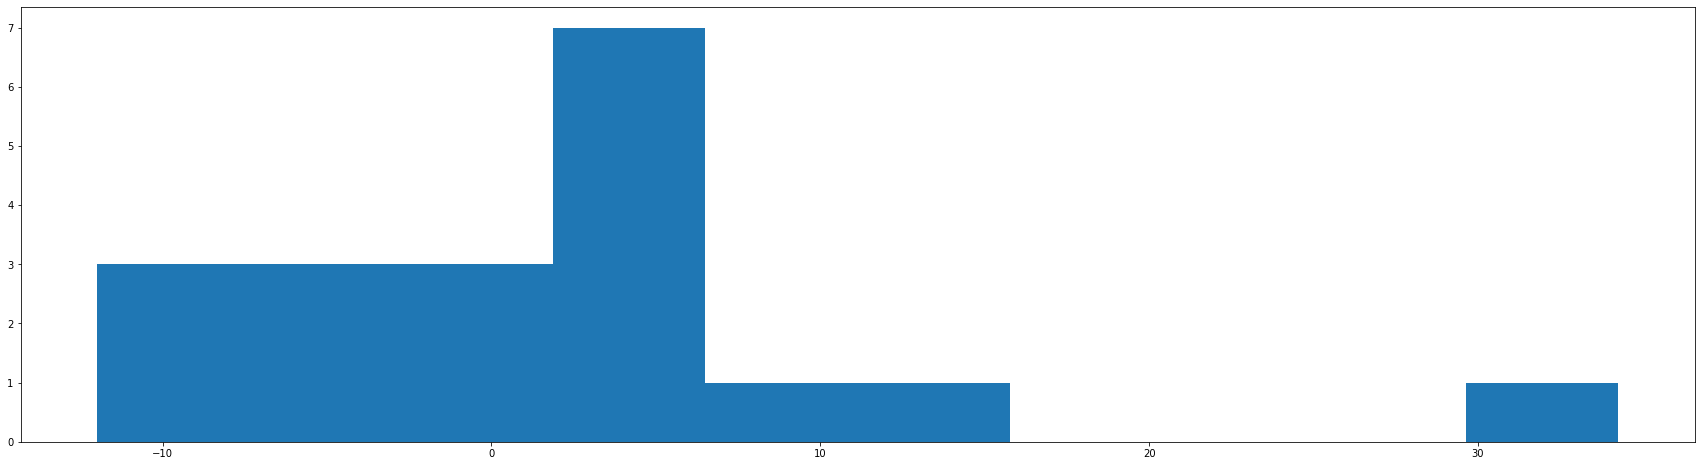

In [24]:
fig, ax = plt.subplots(figsize=(30, 8))
_ = ax.hist(transaction_df['profit_percent'], bins=10)